In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import sys
import os
from tqdm import tqdm

# Add the project root
sys.path.append(os.path.abspath('../../'))

from src.useful_functions import read_dirs_paths
from src.mokito.modules import *

# For matplotlib
font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Read directory paths
read_dirs_paths('dir_paths.txt', globals())

Created variables:
inp_dir = input/
out_trajectories1 = output/trajectories/
out_trajectories2 = output/trajectories/openmm_files/
out_trajectories3 = output/trajectories/openmm_files/initial_states/
out_trajectories4 = output/trajectories/openmm_files/final_states/
out_trajectories5 = output/trajectories/openmm_files/final_states_nh/
out_isokann = output/isokann/
out_mokito = output/mokito/


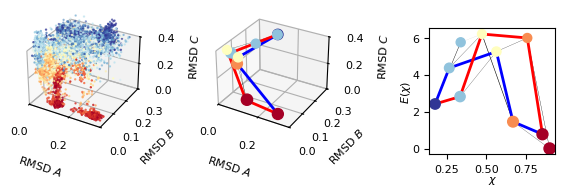

In [8]:
Ra   = np.loadtxt(out_trajectories1 +"Ra.txt")     #  R0.shape = (Npoints,)
Rb   = np.loadtxt(out_trajectories1 +"Rb.txt")     #  R0.shape = (Npoints,)
Rc   = np.loadtxt(out_trajectories1 +"Rc.txt")     #  R0.shape = (Npoints,)

chi = np.loadtxt(out_isokann  +"chi0.txt")   #  chi0.shape = (Npoints,)

with open(out_mokito + "energy_MKM.npy", 'rb') as f1:
    A              = np.load(f1)
    chi_nodes      = np.load(f1)
    energy         = np.load(f1)
    nodes_size     = np.load(f1)
    index_chi_node = np.load(f1)

with open(out_mokito + "rel_coords_MKM.npy", 'rb') as f2:
    chi_nodes = np.load(f2)
    nodes_size = np.load(f2)
    Ra_nodes   = np.load(f2)
    Rb_nodes   = np.load(f2)
    Rc_nodes   = np.load(f2)

G = nx.read_gml(out_mokito + "MKM.gml")



font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig = plt.figure(figsize=(16*in2cm, 16*in2cm))

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(Ra, Rb, Rc, '.', c = chi, s=0.5, cmap = cm.RdYlBu_r, vmin=0.2, vmax = 0.9  )
ax1.set_xlabel(r'RMSD $A$')
ax1.set_ylabel(r'RMSD $B$')
ax1.set_zlabel(r'RMSD $C$')


ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(Ra_nodes, Rb_nodes, Rc_nodes, alpha=1,  s = 0.2*nodes_size, c = index_chi_node, cmap = cm.RdYlBu_r)

ax2.set_xlabel(r'RMSD $A$')
ax2.set_ylabel(r'RMSD $B$')
ax2.set_zlabel(r'RMSD $C$')


for i in range(len(Ra_nodes)):
    for j in range(i+1,len(Ra_nodes)):
        if A[i,j]>0:
            ax2.plot([Ra_nodes[i], Ra_nodes[j]], 
                     [Rb_nodes[i], Rb_nodes[j]], 
                     [Rc_nodes[i], Rc_nodes[j]], 
                     'k-', linewidth =np.log(1+1*A[i,j]),zorder=-1) 


ax3 = fig.add_subplot(1, 3, 3)

ax3.scatter(chi_nodes, energy,  s = 0.2*nodes_size, c = index_chi_node, cmap = cm.RdYlBu_r,zorder=0)

for i in range(G.number_of_nodes()):
    for j in range(i+1,G.number_of_nodes()):
        if A[i,j]>0:
            ax3.plot([chi_nodes[i], chi_nodes[j]], [energy[i], energy[j]], 'k-', linewidth = np.log(1+1*A[i,j]),zorder=-1) 

ax1.set_xlim(0,0.35)
ax1.set_ylim(0,0.3)
ax1.set_zlim(0,0.4)

ax2.set_xlim(0,0.35)
ax2.set_ylim(0,0.3)
ax2.set_zlim(0,0.4)

ax1.set_position([0.0, 0.0, 0.2, 0.4])
ax2.set_position([0.3, 0.0, 0.2, 0.4])
ax3.set_position([0.65, 0.07, 0.2, 0.2])

pathA = [0,3,4,6, 9]
pathB = [0,2,5,7, 9]
ax3.plot(chi_nodes[pathA], energy[pathA], 'b', linewidth = 2,zorder=-1)
ax2.plot(Ra_nodes[pathA], Rb_nodes[pathA], Rc_nodes[pathA], 'b', linewidth = 2,zorder=0)

ax3.plot(chi_nodes[pathB], energy[pathB], 'r', linewidth = 2,zorder=-1)
ax2.plot(Ra_nodes[pathB], Rb_nodes[pathB], Rc_nodes[pathB], 'r', linewidth = 2,zorder=0)

ax3.set_ylabel(r'$E(\chi)$',labelpad=-0)
ax3.set_xlabel(r'$\chi$',labelpad=-0)


#plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.0, hspace=0.0)

fig.savefig("output/figures/fig2.png", format='png', dpi=300, bbox_inches='tight')


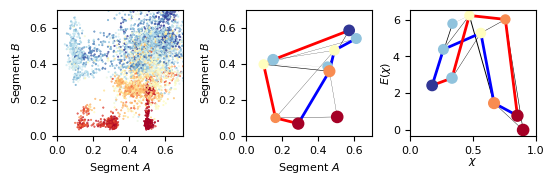

In [9]:
Ra   = np.loadtxt(out_trajectories1 +"Ra.txt")     #  R0.shape = (Npoints,)
Rb   = np.loadtxt(out_trajectories1 +"Rb.txt")     #  R0.shape = (Npoints,)
Rc   = np.loadtxt(out_trajectories1 +"Rc.txt")     #  R0.shape = (Npoints,)
Sa   = np.loadtxt(out_trajectories1 +"Sa.txt")     #  R0.shape = (Npoints,)
Sb   = np.loadtxt(out_trajectories1 +"Sb.txt")     #  R0.shape = (Npoints,)

chi = np.loadtxt(out_isokann  +"chi0.txt")   #  chi0.shape = (Npoints,)

with open(out_mokito + "energy_MKM.npy", 'rb') as f1:
    A              = np.load(f1)
    chi_nodes      = np.load(f1)
    energy         = np.load(f1)
    nodes_size     = np.load(f1)
    index_chi_node = np.load(f1)

with open(out_mokito + "rel_coords_MKM.npy", 'rb') as f2:
    chi_nodes = np.load(f2)
    nodes_size = np.load(f2)
    Ra_nodes   = np.load(f2)
    Rb_nodes   = np.load(f2)
    Rc_nodes   = np.load(f2)
    Sa_nodes   = np.load(f2)
    Sb_nodes   = np.load(f2)

Ra_nodes = Sa_nodes
Rc_nodes = Sb_nodes
Ra = Sa
Rc = Sb


G = nx.read_gml(out_mokito + "MKM.gml")



font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig = plt.figure(figsize=(16*in2cm, 16*in2cm))

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(Ra, Rc,  c = chi, s=0.2, cmap = cm.RdYlBu_r, vmin=0.2, vmax=0.9)
ax1.set_xlabel(r'Segment $A$')
ax1.set_ylabel(r'Segment $B$')


ax2 = fig.add_subplot(1,3,2)

ax2.scatter(Ra_nodes, Rc_nodes, alpha=1,  s = 0.2*nodes_size, c = index_chi_node, cmap = cm.RdYlBu_r)

ax2.set_xlabel(r'Segment $A$')
ax2.set_ylabel(r'Segment $B$')


for i in range(len(Ra_nodes)):
    for j in range(i+1,len(Ra_nodes)):
        if A[i,j]>0:
            ax2.plot([Ra_nodes[i], Ra_nodes[j]], 
                     [Rc_nodes[i], Rc_nodes[j]], 
                     'k-', linewidth = np.log(1+1*A[i,j]),zorder=-1) 


ax3 = fig.add_subplot(1, 3, 3)

ax3.scatter(chi_nodes, energy,  s = 0.2*nodes_size, c = index_chi_node, cmap = cm.RdYlBu_r,zorder=0)

for i in range(G.number_of_nodes()):
    for j in range(i+1,G.number_of_nodes()):
        if A[i,j]>0:
            ax3.plot([chi_nodes[i], chi_nodes[j]], [energy[i], energy[j]], 'k-', linewidth =np.log(1+2*A[i,j]),zorder=-1) 

ax1.set_xlim(0,0.7)
ax1.set_ylim(0,0.7)

ax2.set_xlim(0,0.7)
ax2.set_ylim(0,0.7)

ax1.set_position([0.0, 0.0, 0.2, 0.2])
ax2.set_position([0.3, 0.0, 0.2, 0.2])
ax3.set_position([0.56, 0.0, 0.2, 0.2])




ax3.plot(chi_nodes[pathA], energy[pathA], 'b', linewidth = 2,zorder=-1)
ax2.plot(Ra_nodes[pathA], Rc_nodes[pathA], 'b', linewidth = 2,zorder=0)


ax3.plot(chi_nodes[pathB], energy[pathB], 'r', linewidth = 2,zorder=-1)
ax2.plot(Ra_nodes[pathB],  Rc_nodes[pathB], 'r', linewidth = 2,zorder=0)


ax3.set_ylabel(r'$E(\chi)$',labelpad=-0)
ax3.set_xlabel(r'$\chi$',labelpad=-0)

ax1.set_xticks([0,0.2,0.4,0.6])
ax2.set_xticks([0,0.2,0.4,0.6])
ax3.set_xticks([0,0.5,1.0])
#plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.0, hspace=0.0)

fig.savefig("output/figures/fig2b.png", format='png', dpi=300, bbox_inches='tight')
